In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
actions = [
    'rock',
    'scissors',
    'papper'
]

In [22]:
data = np.concatenate([
    np.load(f'dataset/{f}',allow_pickle=True) for f in os.listdir('dataset') if f.startswith('seq')
])

data.shape

(1212, 30, 76)

In [23]:
x_data = data[:, :, :-1]
Ys = data[:, 0, -1]

print(x_data.shape)
print(Ys.shape)

(1212, 30, 75)
(1212,)


In [24]:
data[0,0, -1]

2.0

In [7]:
pip install tensorflow.keras

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.keras (from versions: none)
ERROR: No matching distribution found for tensorflow.keras


In [9]:
pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=54dd944ab891a503c2f00fe93b580aa1ceee88a3c4f38117640bf63ef2a2ce60
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [25]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(Ys, num_classes = len(actions))
y_data.shape

(1212, 3)

In [26]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1090, 30, 75) (1090, 3)
(122, 30, 75) (122, 3)


In [27]:
x_train.shape[1:]

(30, 75)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                35840     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 38,019
Trainable params: 38,019
Non-trainable params: 0
_________________________________________________________________


In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=15, verbose=1, mode='auto')
    ]
)

Epoch 1/200
34/35 [============================>.] - ETA: 0s - loss: 519.3322 - acc: 0.3171
Epoch 00001: val_acc improved from -inf to 0.27049, saving model to models\model.h5
35/35 [==============================] - 3s 33ms/step - loss: 518.8837 - acc: 0.3165 - val_loss: 250.1651 - val_acc: 0.2705 - lr: 0.0010
Epoch 2/200
33/35 [===========================>..] - ETA: 0s - loss: 290.5116 - acc: 0.4271
Epoch 00002: val_acc improved from 0.27049 to 0.55738, saving model to models\model.h5
35/35 [==============================] - 1s 24ms/step - loss: 293.2126 - acc: 0.4275 - val_loss: 133.4006 - val_acc: 0.5574 - lr: 0.0010
Epoch 3/200
34/35 [============================>.] - ETA: 0s - loss: 297.9294 - acc: 0.3805
Epoch 00003: val_acc did not improve from 0.55738
35/35 [==============================] - 1s 25ms/step - loss: 297.9026 - acc: 0.3798 - val_loss: 181.0843 - val_acc: 0.3852 - lr: 0.0010
Epoch 4/200
33/35 [===========================>..] - ETA: 0s - loss: 405.6264 - acc: 0.3551


Epoch 30/200
33/35 [===========================>..] - ETA: 0s - loss: 3.8732 - acc: 0.8267
Epoch 00030: val_acc did not improve from 0.94262
35/35 [==============================] - 1s 18ms/step - loss: 3.9342 - acc: 0.8257 - val_loss: 2.3762 - val_acc: 0.9426 - lr: 0.0010
Epoch 31/200
34/35 [============================>.] - ETA: 0s - loss: 2.3166 - acc: 0.8888
Epoch 00031: val_acc improved from 0.94262 to 0.96721, saving model to models\model.h5
35/35 [==============================] - 1s 20ms/step - loss: 2.3123 - acc: 0.8890 - val_loss: 0.6361 - val_acc: 0.9672 - lr: 0.0010
Epoch 32/200
32/35 [==========================>...] - ETA: 0s - loss: 1.4118 - acc: 0.9170
Epoch 00032: val_acc did not improve from 0.96721
35/35 [==============================] - 1s 19ms/step - loss: 1.4474 - acc: 0.9156 - val_loss: 0.4894 - val_acc: 0.9672 - lr: 0.0010
Epoch 33/200
34/35 [============================>.] - ETA: 0s - loss: 2.1063 - acc: 0.9007
Epoch 00033: val_acc did not improve from 0.96721


33/35 [===========================>..] - ETA: 0s - loss: 2.2094 - acc: 0.9252
Epoch 00059: val_acc did not improve from 0.98361
35/35 [==============================] - 1s 18ms/step - loss: 2.1680 - acc: 0.9266 - val_loss: 0.6080 - val_acc: 0.9672 - lr: 5.0000e-04
Epoch 60/200
34/35 [============================>.] - ETA: 0s - loss: 1.6633 - acc: 0.9347
Epoch 00060: val_acc did not improve from 0.98361
35/35 [==============================] - 1s 19ms/step - loss: 1.6603 - acc: 0.9349 - val_loss: 0.8545 - val_acc: 0.9672 - lr: 5.0000e-04
Epoch 61/200
35/35 [==============================] - ETA: 0s - loss: 1.2863 - acc: 0.9431
Epoch 00061: val_acc did not improve from 0.98361
35/35 [==============================] - 1s 18ms/step - loss: 1.2863 - acc: 0.9431 - val_loss: 0.2852 - val_acc: 0.9754 - lr: 5.0000e-04
Epoch 62/200
33/35 [===========================>..] - ETA: 0s - loss: 0.5411 - acc: 0.9593
Epoch 00062: val_acc did not improve from 0.98361
35/35 [==============================]

Epoch 88/200
33/35 [===========================>..] - ETA: 0s - loss: 0.3195 - acc: 0.9811
Epoch 00088: val_acc did not improve from 1.00000
35/35 [==============================] - 1s 18ms/step - loss: 0.3522 - acc: 0.9807 - val_loss: 0.0052 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 89/200
33/35 [===========================>..] - ETA: 0s - loss: 0.2453 - acc: 0.9801
Epoch 00089: val_acc did not improve from 1.00000
35/35 [==============================] - 1s 18ms/step - loss: 0.2815 - acc: 0.9789 - val_loss: 0.1384 - val_acc: 0.9672 - lr: 2.5000e-04
Epoch 90/200
33/35 [===========================>..] - ETA: 0s - loss: 0.3779 - acc: 0.9697
Epoch 00090: val_acc did not improve from 1.00000
35/35 [==============================] - 1s 21ms/step - loss: 0.3721 - acc: 0.9697 - val_loss: 0.1064 - val_acc: 0.9918 - lr: 2.5000e-04
Epoch 91/200
34/35 [============================>.] - ETA: 0s - loss: 0.3064 - acc: 0.9844
Epoch 00091: val_acc did not improve from 1.00000
35/35 [==================

Epoch 117/200
32/35 [==========================>...] - ETA: 0s - loss: 0.2186 - acc: 0.9785
Epoch 00117: val_acc did not improve from 1.00000
35/35 [==============================] - 1s 18ms/step - loss: 0.2056 - acc: 0.9798 - val_loss: 7.1432e-05 - val_acc: 1.0000 - lr: 6.2500e-05
Epoch 118/200
34/35 [============================>.] - ETA: 0s - loss: 0.2110 - acc: 0.9835
Epoch 00118: val_acc did not improve from 1.00000
35/35 [==============================] - 1s 17ms/step - loss: 0.2106 - acc: 0.9835 - val_loss: 0.0616 - val_acc: 0.9836 - lr: 6.2500e-05
Epoch 119/200
32/35 [==========================>...] - ETA: 0s - loss: 0.2282 - acc: 0.9834
Epoch 00119: val_acc did not improve from 1.00000
35/35 [==============================] - 1s 16ms/step - loss: 0.2183 - acc: 0.9826 - val_loss: 0.0400 - val_acc: 0.9918 - lr: 6.2500e-05
Epoch 120/200
32/35 [==========================>...] - ETA: 0s - loss: 0.1928 - acc: 0.9834
Epoch 00120: val_acc did not improve from 1.00000
35/35 [==========

Epoch 146/200
35/35 [==============================] - ETA: 0s - loss: 0.2154 - acc: 0.9872
Epoch 00146: val_acc did not improve from 1.00000
35/35 [==============================] - 1s 18ms/step - loss: 0.2154 - acc: 0.9872 - val_loss: 0.0039 - val_acc: 1.0000 - lr: 1.5625e-05
Epoch 147/200
34/35 [============================>.] - ETA: 0s - loss: 0.1836 - acc: 0.9871
Epoch 00147: val_acc did not improve from 1.00000
35/35 [==============================] - 1s 18ms/step - loss: 0.1832 - acc: 0.9872 - val_loss: 0.0188 - val_acc: 0.9918 - lr: 1.5625e-05
Epoch 148/200
33/35 [===========================>..] - ETA: 0s - loss: 0.1866 - acc: 0.9848
Epoch 00148: val_acc did not improve from 1.00000
35/35 [==============================] - 1s 18ms/step - loss: 0.1808 - acc: 0.9853 - val_loss: 0.0122 - val_acc: 0.9918 - lr: 1.5625e-05
Epoch 149/200
32/35 [==========================>...] - ETA: 0s - loss: 0.1809 - acc: 0.9863
Epoch 00149: val_acc did not improve from 1.00000
35/35 [==============

Epoch 175/200
34/35 [============================>.] - ETA: 0s - loss: 0.1698 - acc: 0.9853
Epoch 00175: val_acc did not improve from 1.00000
35/35 [==============================] - 1s 19ms/step - loss: 0.1694 - acc: 0.9853 - val_loss: 0.0540 - val_acc: 0.9918 - lr: 3.9063e-06
Epoch 176/200
32/35 [==========================>...] - ETA: 0s - loss: 0.1734 - acc: 0.9863
Epoch 00176: val_acc did not improve from 1.00000
35/35 [==============================] - 1s 18ms/step - loss: 0.1692 - acc: 0.9862 - val_loss: 0.0483 - val_acc: 0.9918 - lr: 3.9063e-06
Epoch 177/200
33/35 [===========================>..] - ETA: 0s - loss: 0.1744 - acc: 0.9848
Epoch 00177: val_acc did not improve from 1.00000
35/35 [==============================] - 1s 21ms/step - loss: 0.1690 - acc: 0.9853 - val_loss: 0.0576 - val_acc: 0.9918 - lr: 3.9063e-06
Epoch 178/200
33/35 [===========================>..] - ETA: 0s - loss: 0.1749 - acc: 0.9877
Epoch 00178: val_acc did not improve from 1.00000
35/35 [==============

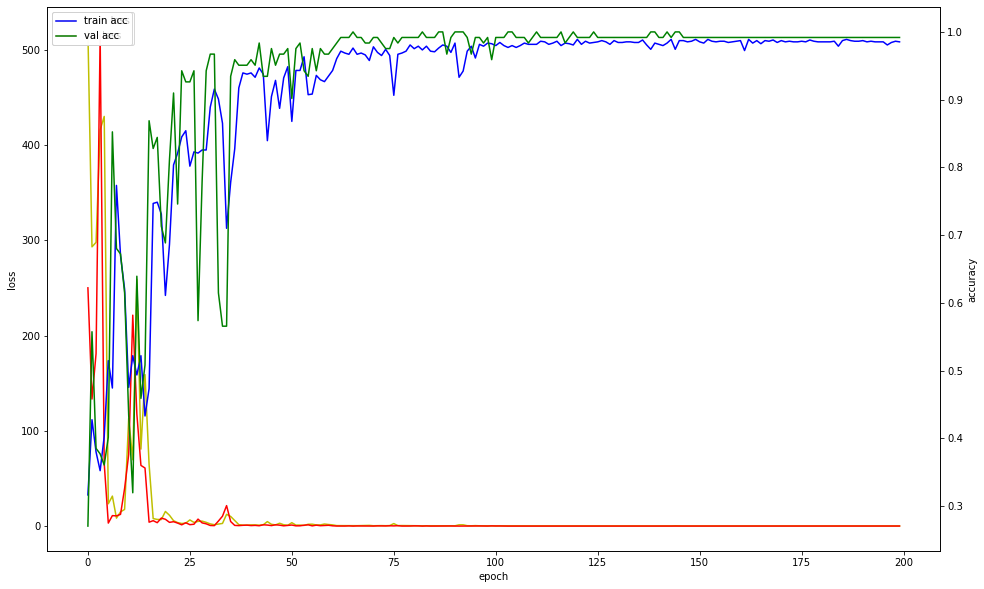

In [30]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [32]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_test)

multilabel_confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

array([[[90,  0],
        [ 0, 32]],

       [[81,  0],
        [ 0, 41]],

       [[73,  0],
        [ 0, 49]]], dtype=int64)